## Pandas 

Очень часто при работе с данными приходится оперировать табличными данными. Недаром офисные программы наподобие Microsoft Excel используются очень широко во множестве задач. **Pandas** - это библиотека для работы с такими табличными данными на Python.

В её основе лежат два основных понятия:

* **Series** - это некоторая последовательность значений одного типа. Основное отличие от массива numpy в том, что у Series есть **индекс**
* **DataFrame** - квадратная таблица с данными, по сути дела - набор различных Series с общим индексом  

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Series

Series - это последовательность данных с индексом. Все операции с последовательностями выравниваются по индексу. Например, если есть последовательность измерений, сделанных раз в день, и измерений, сделанных раз в час, индексированных по времени - то их можно корректно сложить, и это сложение будет учитывать время.

Последовательности можно явно создать из массивов или списков:

In [48]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(b)

0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


Очень часто последовательности представляют собой **временные ряды**. Во временных рядах индекс имеет специальную структуру - диапазон дат или точек во времени. Такой индекс можно создать с помощью `pd.date_range`.

Предположим, у нас есть временной ряд, показывающий объем продажи продуктов по дням, и при этом каждое воскресенье мы хотим забирать какое-то количество продуктов себе. Это можно смоделировать следующим образом. Для начала, определим объекты на продажу:

Length of index is 366


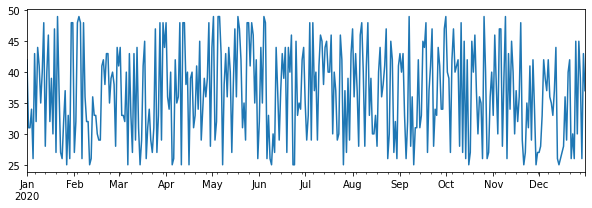

In [49]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

Далее, зададим `aditional items` - это количество продуктов, которые мы будем забирать. В индексе зададим параметр `freq='W'`, что означает еженедельно.

In [50]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
total_items = items_sold+additional_items
print(f"Total items:\n{total_items}")

Total items:
2020-01-01     NaN
2020-01-02     NaN
2020-01-03     NaN
2020-01-04     NaN
2020-01-05    36.0
              ... 
2020-12-27    55.0
2020-12-28     NaN
2020-12-29     NaN
2020-12-30     NaN
2020-12-31     NaN
Length: 366, dtype: float64


Мы видим, что большинство значений получились равными `NaN` (*Not a Number*). Это произошло потому, что в недельном временном ряде отсутствуют значения для конкретных дней, поэтому при сложении получается неопределённое значение. Чтобы это избежать, нам необходимо указать `fill_value`, которым будут заполняться отсутствующие значения:

2020-01-01    42.0
2020-01-02    31.0
2020-01-03    31.0
2020-01-04    34.0
2020-01-05    36.0
              ... 
2020-12-27    55.0
2020-12-28    39.0
2020-12-29    26.0
2020-12-30    43.0
2020-12-31    37.0
Length: 366, dtype: float64


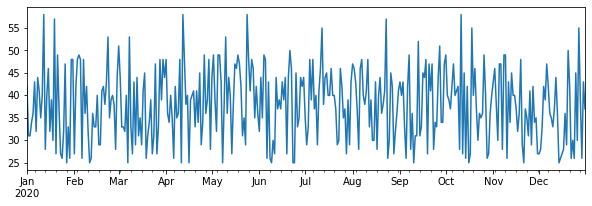

In [51]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

Такой график не очень наглядно показывает нам объемы продаж. Более наглядно было бы посмотреть на средние продажи по месяцам. Для этого используем метод `resample`, чтобы получить временной ряд из уседнённых значений по месяцам:

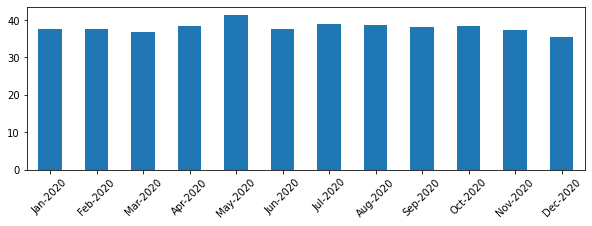

In [52]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## DataFrame

Наиболее часто используемая структура в Pandas - это **DataFrame**. Он представляет собой прямоугольную таблицу, похожую на электронную таблицу Excel или Google Sheets. Внутри DataFrame организован как набор последовательностей с общим индексом.

Мы можем взять определённые ранее последовательности `a` и `b`, и объединить их в DataFrame:

In [53]:
df = pd.DataFrame([a,b])
df

,0,1,2,3,4,5,6,7,8
0,1,2,3,4,5,6,7,8,9
1,I,like,to,use,Python,and,Pandas,very,much


В этом случае каждая последовательность стала строкой таблицы, однако на практике чаще удобно объединять последовательности по столбцам. Мы можем создать DataFrame, где каждая из последовательностей будет столбцом, при этом явно указать названия столбцов:

In [54]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

,A,B
0,1,I
1,2,like
2,3,to
3,4,use
4,5,Python
5,6,and
6,7,Pandas
7,8,very
8,9,much


Такого же результата можно достичь, взяв первоначальный DataFrame, объединённый по строкам, транспонировав его, и переименовав столбцы:

In [55]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

,A,B
0,1,I
1,2,like
2,3,to
3,4,use
4,5,Python
5,6,and
6,7,Pandas
7,8,very
8,9,much


Этот пример показывает, как мы можем оперировать с DataFrame, применяя к нему последовательно несколько операций - сначала транспонирование (`.T`), а потом - переименование столбцов. Использование методов позволяет просто перечислять такую последовательности операций через точку. 

#### Столбцовая индексация

Из DataFrame можно **выбирать столбцы** по имени с помощью обычного индексирования:

In [56]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


#### Выбор строк по критерию

Выбор строк может осуществляться по-разному. Наиболее мощной возможностью Pandas является **выбор строк по некоторому критерию**:

In [57]:
df[df['A']<5]

,A,B
0,1,I
1,2,like
2,3,to
3,4,use


Это позволяет выбрать те строки, у которых значение в столбце `A` меньше 5.

Работает это следующим образом. Выражение `df['A']<5` возвращает **последовательность типа bool**, где для каждого элемента исходной последовательности `df['A']` содержится значение `True` или `False`. Когда такая логическая последовательность используется в качестве индекса, происходит операция выборки строк, которым в индексе соответствует значение `True`. 

Важно помнить, что под индексом стоит не просто выражение типа `bool`, а выражение над последовательностиями. Например, конструкция `df[df['A']>5 and df['A']<7]` приведёт к ошибке, так как операция `and` не может применяться к последовательностям. Вместо этого, для поэлементных логических операций над последовательностями можно использовать специальные операции `&` и `|`:

In [58]:
df[(df['A']>5) & (df['A']<7)]

,A,B
5,6,and


#### Вычисляемые столбцы

Мы можем добавлять новые вычисляемые столбцы в DataFrame с помощью интуитивно-понятных выражений. Например, чтобы вычислить отклонение столбца `A` от среднего значения, можем использовать такой фрагмент кода:

In [59]:
df['DivA'] = df['A']-df['A'].mean()
df

,A,B,DivA
0,1,I,-4.0
1,2,like,-3.0
2,3,to,-2.0
3,4,use,-1.0
4,5,Python,0.0
5,6,and,1.0
6,7,Pandas,2.0
7,8,very,3.0
8,9,much,4.0


Здесь выражение `df['A'].mean()` вычисляет среднее, `df['A']-df['A'].mean()` вычисляет столбец - отклонение (используется такой же принцип приведения размерностей, как и для numpy), а затем мы присваиваем полученную последовательность новому столбцу.

Важно, что выражение справа от знака присваивания должно представлять собой последовательность. Поэтому следующие выражения будут ошибочны:

In [60]:
# df['ADescr'] = "Low" if df['A'] < 5 else "Hi" -- ошибка типизации
df['LenB'] = len(df['B']) # неправильный результат
df

,A,B,DivA,LenB
0,1,I,-4.0,9
1,2,like,-3.0,9
2,3,to,-2.0,9
3,4,use,-1.0,9
4,5,Python,0.0,9
5,6,and,1.0,9
6,7,Pandas,2.0,9
7,8,very,3.0,9
8,9,much,4.0,9


В последней случае ошибки не возникает, но всем ячейкам в столбце `LenB` присваивается одинаковое значение - количество строк в DataFrame. 

Чтобы применить такие операции, как `len` или поэлементное сравнение к каждому элементу последовательности - можно использовать функцию `.apply`:

In [61]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# или
df['LenB'] = df['B'].apply(len)
df

,A,B,DivA,LenB
0,1,I,-4.0,1
1,2,like,-3.0,4
2,3,to,-2.0,2
3,4,use,-1.0,3
4,5,Python,0.0,6
5,6,and,1.0,3
6,7,Pandas,2.0,6
7,8,very,3.0,4
8,9,much,4.0,4


#### Индексация строк

Для **выбора строк по номеру** используется конструкция `iloc`. Например, чтобы выбрать первые 5 строк:

In [62]:
df.iloc[:5]

,A,B,DivA,LenB
0,1,I,-4.0,1
1,2,like,-3.0,4
2,3,to,-2.0,2
3,4,use,-1.0,3
4,5,Python,0.0,6


#### Группировка и сводные таблицы

**Группировка** используется, чтобы получить результат, аналогичный **сводным таблицам** (*pivot tables*) в Excel. Предположим, мы хотим вычислить среднее значение столбца `A` по каждому из значений `LenB`. Для этого мы группируем DataFrame по столбцу `LenB`, и затем вызываем `mean`:

In [63]:
df.groupby(by='LenB').mean()

,A,DivA
LenB,,
1,1.000000,-4.000000
2,3.000000,-2.000000
3,5.000000,0.000000
4,6.333333,1.333333
6,6.000000,1.000000


В результате операции `.groupby` мы получаем специальную структуру, в которой строки исходного DataFrame сгруппированы по значениям `LenB` (и эти значения становятся новым индексом). Применение `.mean` снова преобразует эту структуру к DataFrame.

Если нам нужно вычислить сразу несколько значений по каждой группе, то можно использовать более сложную функцию `aggregate`, в которой для каждого столбца можно указать свою функцию агрегирования:

In [64]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

,Count,Mean
LenB,,
1,1,1.000000
2,1,3.000000
3,2,5.000000
4,3,6.333333
6,2,6.000000


В этом примере мы применяем к столбцу 'A' фукцию усреднения (получая среднее по столбцу 'A', как и в прошлом примере), а к столбцу `DivA` - функцию `len`, что даёт нам по сути количество записей в группе. Для ясности затем стоит переименовать столбцы функцией `.rename`.

В нашем случае `LenB` становится индексом нового DataFrame. Если мы хотим, чтобы оно стало обычным столбцом (например, чтобы осуществлять дальнейшее агрегирование), то надо применить реиндексацию:

In [65]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'}) \
 .reset_index()

,LenB,Count,Mean
0,1,1,1.000000
1,2,1,3.000000
2,3,2,5.000000
3,4,3,6.333333
4,6,2,6.000000


### Объединение таблиц

Добавим ещё один вычисляемый столбец:

In [66]:
df["ADescr"] = df["A"].apply(lambda x: "Hi" if x>5 else "Low")
df

,A,B,DivA,LenB,ADescr
0,1,I,-4.0,1,Low
1,2,like,-3.0,4,Low
2,3,to,-2.0,2,Low
3,4,use,-1.0,3,Low
4,5,Python,0.0,6,Low
5,6,and,1.0,3,Hi
6,7,Pandas,2.0,6,Hi
7,8,very,3.0,4,Hi
8,9,much,4.0,4,Hi


Предположим с каждым из описаний `Low` и `Hi` у нас связано некоторое значение `Value`. Опишем это с помощью отдельного датафрейма:

In [67]:
df1 = pd.DataFrame( { "Descr" : ["Low","Hi"], "Value" : [100,200] })
df1

,Descr,Value
0,Low,100
1,Hi,200


Вполне естественное желание - объединить эти датафреймы, чтобы к исходному датафрейму добавилась колонка `Value`, соответствующая значению `ADescr`.

Можно было бы добавить соответствующую вычисляемую колонку и ней делать поиск по второму датафрейму, но это не слишком эффективная операция. На самом деле следует воспользоваться операцией **объединения таблиц** `join`. Для этого, преобразуем датафрейм `df1` так, чтобы стобец `Descr` стал индексом:

In [68]:
df1.set_index('Descr')

,Value
Descr,
Low,100
Hi,200


Вооружившись этим рецептом, используем функцию `join` применительно к первому датафрейму, указав в параметре `on=` имя столбца для соединения:

In [69]:
df.join(df1.set_index('Descr'), on='ADescr')

,A,B,DivA,LenB,ADescr,Value
0,1,I,-4.0,1,Low,100
1,2,like,-3.0,4,Low,100
2,3,to,-2.0,2,Low,100
3,4,use,-1.0,3,Low,100
4,5,Python,0.0,6,Low,100
5,6,and,1.0,3,Hi,200
6,7,Pandas,2.0,6,Hi,200
7,8,very,3.0,4,Hi,200
8,9,much,4.0,4,Hi,200


## Визуализация

Визуализация данных - это то, что помогает понять особенности проблемы и увидеть какие-то зависимости в данных. Pandas содержит средства визуализации, которые базируются на уже известной нам библиотеке `matplotlib`.

Для начала полезно знать, как посмотреть на данные в табличном виде. Если DataFrame большой, то быват полезным посмотреть на первые несколько строчек с помощью `df.head()`:

In [70]:
df.head()

,A,B,DivA,LenB,ADescr
0,1,I,-4.0,1,Low
1,2,like,-3.0,4,Low
2,3,to,-2.0,2,Low
3,4,use,-1.0,3,Low
4,5,Python,0.0,6,Low


Для графического отображения значений последовательности используется функция `plot`:

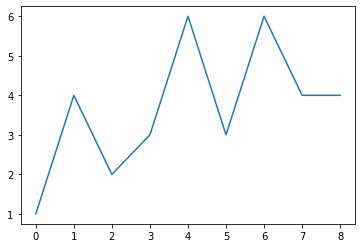

In [71]:
df['LenB'].plot()
plt.show()

`plot` также поддерживает много разных типов графиков - для этого надо задать параметр `kind=`:


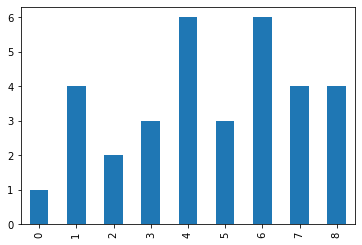

In [72]:
df['LenB'].plot(kind='bar')
plt.show()

Если нужно посмотреть зависимость одного столбца от другого, то имеет смысл использовать **точечный график** (scatter plot):

<AxesSubplot:xlabel='DivA', ylabel='LenB'>

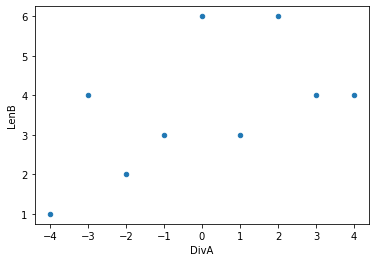

In [73]:
df.plot.scatter(x='DivA',y='LenB')

## Чтение и запись файлов

Часто возникает необходимость получить данные из внешних файлов - например, документа Excel, или часто используемого для обмена табличными данными формата CSV (*Comma Separated Values*). Pandas поддерживает чтение и запись таких форматов.

Например, загрузим данные о динамике заболеваний COVID-19 в разных странах. Мы можем загрузить данные как из файла на диске, так и напрямую из интернет:

In [74]:
df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
#df = pd.read_csv("../../../data/time_series_covid19_confirmed_global.csv")
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/20/22,8/21/22,8/22/22,8/23/22,8/24/22,8/25/22,8/26/22,8/27/22,8/28/22,8/29/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,190435,190643,191040,191247,191585,191967,191967,191967,192463,192906
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,325736,326077,326181,326787,327232,327607,327961,328299,328515,328571
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,269731,269805,269894,269971,270043,270097,270145,270175,270194,270235
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,45975,45975,45975,45975,46027,46027,46027,46027,46027,46027
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,102636,102636,102636,102636,102636,102636,102636,102636,102636,102636


Немного преобразуем эти данные, оставив только данные для Москвы:

In [75]:
df = df[df['Country/Region']=='Russia']
df = df.iloc[:,4:].T.set_axis(['Infected'],axis=1)
df

,Infected
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
...,...
8/25/22,18985174
8/26/22,19030966
8/27/22,19077368
8/28/22,19123501


<AxesSubplot:>

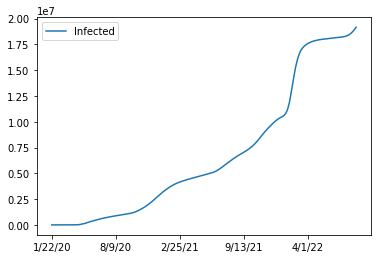

In [76]:
df.plot()

Попробуем вычислить прирост заболевших в каждый из дней. Для этого используем функцию `.diff()`, которая вычисляет разницу между следующим и предыдущим значением в каждом из столбцов, после чего присвоим разницу новому столбцу с именем `Diff`:

<AxesSubplot:>

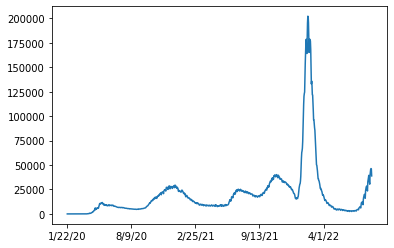

In [77]:
df['Diff'] = df.diff()['Infected']
df['Diff'].plot()

Немного сгладим кривую, посчитав скользящее среднее по нескольким дням:

<AxesSubplot:>

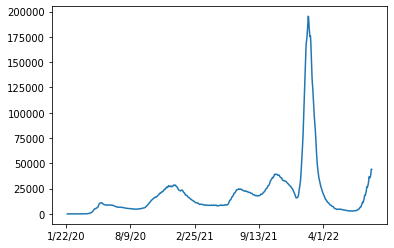

In [78]:
df['Diff_Roll'] = df['Diff'].rolling(5).mean()
df['Diff_Roll'].plot()

Чтобы сохранить полученные значения, используем метод `.to_csv`:

In [79]:
df.to_csv('result.csv')

### Выводы

Pandas - это мощный инструмент анализа данных, работающий с последовательностями величин и с прямоугольными таблицами (DataFrame). Этот инструмент позволяет легко, несколькими строчками кода, производить агрегирование данных, визуализацию результатов, вычисление новых значений и соединение данных из нескольких источников.